<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [84]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [85]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [86]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv('weight_height.csv')
des = df.describe()
des.loc['NaN']=df.isna().sum()
des.loc['%Nan']=(df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
NaN,0.000000,0.000000
%Nan,0.000000,0.000000


In [87]:
#qué aspecto (columnas) tiene el dataset? Veo las 1eras filas:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [88]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

#no se encontraron elementos faltantes en la inspección. Se opera igualmente según lo pedido:
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Height'], inplace=True)
df.dropna(subset=['Weight'], inplace=True)

In [89]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.shape

(10000, 3)

In [90]:
#visualizo sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [91]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

df2=df.copy()

#renombramos las columnas (puedo usar directamente el método columns, o reestablecerlas mediante un diccionario)
df2 = df2.rename(columns={'Gender':'Sexo','Height':'Altura (m)','Weight':'Peso (kg)'})
df2.columns

Index(['Sexo', 'Altura (m)', 'Peso (kg)'], dtype='object')

In [92]:
#conversión de unidades y sexo
df2['Sexo']=df2['Sexo'].apply(lambda x: 'masculino' if x=='Male' else 'femenino')

df2['Altura (m)']=df2['Altura (m)'].apply(lambda y: round(y*0.0254,3))

df2['Peso (kg)']=df2['Peso (kg)'].apply(lambda z: round(z*0.453592,3))

#cómo quedó
df2.head()

,Sexo,Altura (m),Peso (kg)
0,masculino,1.876,109.721
1,masculino,1.747,73.623
2,masculino,1.882,96.498
3,masculino,1.822,99.810
4,masculino,1.775,93.599


In [93]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

print(f'Cantidad de filas a analizar: {df2.shape[0]}')

Cantidad de filas a analizar: 10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

<AxesSubplot:xlabel='Altura (m)', ylabel='Peso (kg)'>

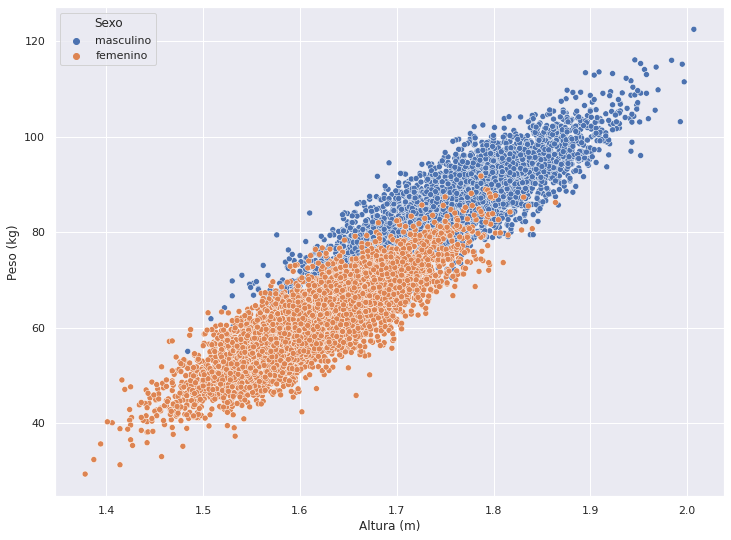

In [94]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

sns.set(rc={"figure.figsize":(12, 9)}) #(width,height)
sns.scatterplot(data=df2, x='Altura (m)', y='Peso (kg)', hue='Sexo')

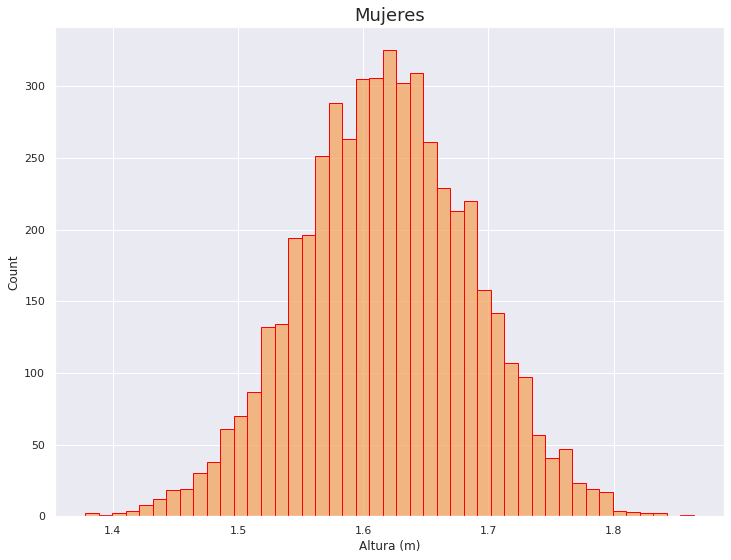

Altura promedio: 1.6182076


In [95]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

#mujeres
graph1 = sns.histplot(df2[df2['Sexo']=='femenino']['Altura (m)'], color='sandybrown', edgecolor='red')
graph1.set_title('Mujeres', fontdict={'size': 18})
plt.show()
print('Altura promedio:', df2[df2['Sexo']=='femenino']['Altura (m)'].mean())


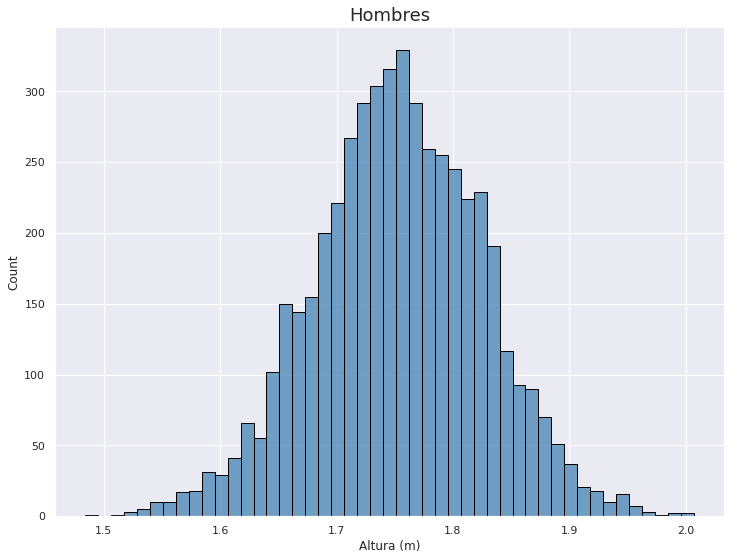

Altura promedio: 1.7532712


In [96]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

#mujeres
graph1 = sns.histplot(df2[df2['Sexo']=='masculino']['Altura (m)'], color='steelblue', edgecolor='black')
graph1.set_title('Hombres', fontdict={'size': 18})
plt.show()
print('Altura promedio:', df2[df2['Sexo']=='masculino']['Altura (m)'].mean())


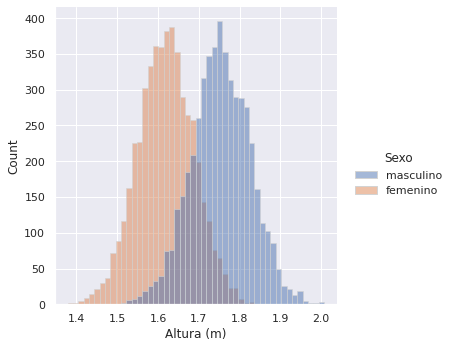

In [97]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

sns.displot(data=df2, x='Altura (m)', hue='Sexo', edgecolor='lightgrey')
plt.show()


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [98]:
#Obtener las variables X e y (para masculino y/o femenino)

# Para los valores de X, se emplea doble corchete porque precisa un elemento vectorial de dim nx1. Los valores de y, son de 1x1.

#Femenino 
# filtro el dataset para sexo femenino
df_fem = df2[ df2['Sexo'] == 'femenino']
X_fem = df_fem[['Peso (kg)']].values
y_fem = df_fem['Altura (m)'].values

#Masculino
#filtro el dataset para sexo masculino
df_mas = df2[ df2['Sexo'] == 'masculino']
X_mas = df_mas[['Peso (kg)']].values
y_mas = df_mas['Altura (m)'].values


In [99]:
#Dividir el dataset en train y test 70%30%

from sklearn.model_selection import train_test_split

X_train_fem, X_test_fem, y_train_fem, y_test_fem = train_test_split(X_fem, y_fem, test_size=0.3, random_state=42) #femenino
X_train_mas, X_test_mas, y_train_mas, y_test_mas = train_test_split(X_mas, y_mas, test_size=0.3, random_state=42) #masculino

In [100]:
#Entrenar un modelo de regresión (creo los modelos de linear regression para femenino y masculino)

from sklearn.linear_model import LinearRegression

#femenino
lr_fem = LinearRegression()
lr_fem.fit(X_train_fem, y_train_fem)
y_hat_fem = lr_fem.predict(X_test_fem) #guardo los resultados de las predicciones

#masculino
lr_mas = LinearRegression()
lr_mas.fit(X_train_mas, y_train_mas)
y_hat_mas = lr_fem.predict(X_test_mas) #guardo los resultados de las predicciones


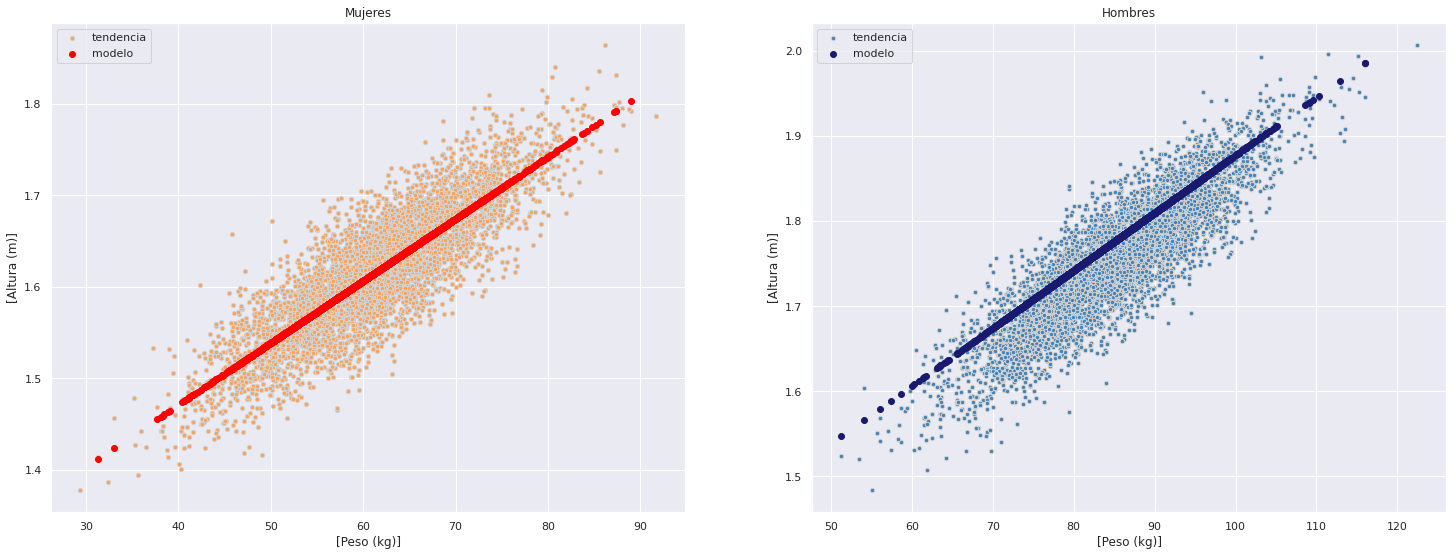

In [101]:
#Dibujar el resultado de la regresion sobre los datos de entrada (datos de entrada: X, peso. Datos de salida: y, altura)

#femenino

#pruebo con matplotlib 
fig = plt.figure()
fig.set_size_inches(25, 9)
ax1_fem = fig.add_subplot(1, 2, 1) 
ax2_mas = fig.add_subplot(1, 2, 2)

ax1_fem.set_title('Mujeres')
ax1_fem.set_xlabel('Peso')
ax1_fem.set_ylabel('Altura')

df_fem.plot.scatter(['Peso (kg)'], ['Altura (m)'], color = 'sandybrown', edgecolor='lightgrey', ax=ax1_fem, label='tendencia')
ax1_fem.scatter(X_test_fem, y_hat_fem, color='red', label='modelo') 
ax1_fem.legend()
#plt.show() #interesante! con esta línea de plt.show, se mostraba sólamente el gráfico de mujeres (aún cuando estuvieran ambos show)

ax2_mas.set_title('Hombres')
ax2_mas.set_xlabel('Peso')
ax2_mas.set_ylabel('Altura')

df_mas.plot.scatter(['Peso (kg)'], ['Altura (m)'], color = 'steelblue', edgecolor='lightgrey', ax=ax2_mas, label='tendencia')
ax2_mas.scatter(X_test_mas, y_hat_mas, color='midnightblue', label='modelo')
ax2_mas.legend()
plt.show()



# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [102]:
#Calcular la métrica r2_score del modelo (y_hat vs y_test)

from sklearn.metrics import r2_score

value_fem = r2_score(y_test_fem, y_hat_fem)
print(f'Coeficiente de determinación -caso femenino-: {round(value_fem,3)}')

value_mas = r2_score(y_test_mas, y_hat_mas)
print(f'Coeficiente de determinación -caso masculino-: {round(value_mas,3)}')


Coeficiente de determinación -caso femenino-: 0.731
Coeficiente de determinación -caso masculino-: 0.654


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [110]:
#Uso el modelo de linear regression

#femenino
pes_fem = np.array([[60]]) #prueba para una masa de 60 kg
y_hat_fem_prueba = lr_fem.predict(pes_fem)

#masculino
pes_mas = np.array([[90]]) #prueba para una masa de 90 kg
y_hat_mas_prueba = lr_mas.predict(pes_mas)

print(f'Para una mujer de {pes_fem} kg de masa, el modelo predice una estatura de {y_hat_fem_prueba} m.\n')
print(f'Para un hombre de {pes_mas} kg de masa, el modelo predice una estatura de {y_hat_mas_prueba} m.')


Para una mujer de [[60]] kg de masa, el modelo predice una estatura de [1.60661158] m.

Para un hombre de [[90]] kg de masa, el modelo predice una estatura de [1.78943293] m.
